In [47]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

#Scrapes transcript text from scrapsfromtheloft.com
def url_to_transcript(url):
    '''
    Returns transcript data scraped from scrapsfromtheloft.com
    '''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_ = "post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts from netflix specials ranked as top 10 from from ranker.com
urls =  ['https://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
         'https://scrapsfromtheloft.com/2017/05/10/bill-burr-walk-way-2017-full-transcript/',
         'https://scrapsfromtheloft.com/2017/04/19/tom-segura-mostly-stories-2016-full-transcript/',
         'https://scrapsfromtheloft.com/2017/08/06/bo-burnham-make-happy-2016-full-transcript/',
         'https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
         'https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/',
         'https://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
         'https://scrapsfromtheloft.com/2017/12/07/aziz-ansari-buried-alive-2013-full-transcript/',
         'https://scrapsfromtheloft.com/2018/01/03/dave-chappelle-equanimity-2017-full-transcript/',
         'https://scrapsfromtheloft.com/2017/04/08/louis-c-k-2017-full-transcript/']
# Comedian names
comedians = ['john', 'bill', 'tom', 'bo', 'ricky', 'joe', 'mike', 'aziz', 'dave','louis']

In [48]:
#Requests transcripts
transcripts = [url_to_transcript(links) for links in urls]

https://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
https://scrapsfromtheloft.com/2017/05/10/bill-burr-walk-way-2017-full-transcript/
https://scrapsfromtheloft.com/2017/04/19/tom-segura-mostly-stories-2016-full-transcript/
https://scrapsfromtheloft.com/2017/08/06/bo-burnham-make-happy-2016-full-transcript/
https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/
https://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
https://scrapsfromtheloft.com/2017/12/07/aziz-ansari-buried-alive-2013-full-transcript/
https://scrapsfromtheloft.com/2018/01/03/dave-chappelle-equanimity-2017-full-transcript/
https://scrapsfromtheloft.com/2017/04/08/louis-c-k-2017-full-transcript/


In [49]:
#Pickle transcripts for future use
#Make directory to store txt files
!mkdir netflix_specials_transcripts

for i,c in enumerate(comedians):
    with open("netflix_specials_transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: netflix_specials_transcripts: File exists


In [50]:
#Load pickeled files
data = {}
for i,c in enumerate(comedians):
    with open("netflix_specials_transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

data.keys()

dict_keys(['john', 'bill', 'tom', 'bo', 'ricky', 'joe', 'mike', 'aziz', 'dave', 'louis'])

In [51]:
#check
data['aziz'][:2]
#Dictionary key = comedian and value = text chunked up as a list

['Ladies and gentlemen… Aziz Ansari! Thank you. Thank you. Thank you. Thank you so much. Philadelphia, wow! Thank you. Thank you so much! Wow! Wow! This is awkward. I actually have no material prepared. Um… I just booked this venue for this date and I was like, Oh, I’ll have an act by then. I…don’t, uh… No, it’s gonna be really good. I have one prepared which is convenient ’cause we’re filming and everything. Uh, so, let’s begin.\nI, uh, turned 30 years old this year. Yes, it’s been a good year. I have found this year to be the year where a lot of my friends are getting serious about their lives. You know, they call me up. They say serious things. They’re like, “Aziz, you’re not gonna believe it! I just had a baby!” And I always have the same reaction. I always go, “Ha, ha, ha, ha, ha, ha! That sucks! “I’m so sorry that happened. “Why weren’t you guys not using condoms or birth control? “You’re gonna have to take care of that thing forever! “All right, well, I’ll talk to you later. “I’

## Cleaning Data

In [52]:
def combine_text(list_of_text):
    '''
    Takes list of text and combines them into one large chunk of text
    '''
    combined_text = ' '.join(list_of_text)
    return combined_text

data_combined = {key:[combine_text(value)] for (key,value) in data.items()}

In [53]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
aziz,"Ladies and gentlemen… Aziz Ansari! Thank you. Thank you. Thank you. Thank you so much. Philadelphia, wow! Thank you. Thank you so much! Wow! Wow! ..."
bill,"Netflix special filmed on October 21, 2016 at The Ryman Auditorium in Nashville. All right, thank you. Thank you very much. How are you? How’s it ..."
bo,"[woman on TV] That has been, really, a difficult thing for me. My mother has always been a very difficult person all her life. Very unhappy. I can..."
dave,"“Equanimity” was shot in Washington, D.C., and it covers the material that Chappelle developed in his monthlong stint at Radio City Music Hall in ..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,"Louis C.K Netflix special filmed in Washington D.C. and premiered April 4, 2017 Go ahead and do the lights. [audience cheering] Go ahead. Ladies a..."
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ..."
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...
tom,[soft piano music plays] [Tom] I love being a stand-up comedian. It’s the best job in the world. And I love being an L.A. comic. Bam! Alfred the a...


In [54]:
data_df.transcript.loc['louis']

'Louis C.K Netflix special filmed in Washington D.C. and premiered April 4, 2017 Go ahead and do the lights. [audience cheering] Go ahead. Ladies and gentlemen, Louis C.K. [audience cheering] Hello. Thank you. Thank you very much. Thank you. Um… – So, you know, I think abortion is, um… – [audience laughing] I… Here’s what I think. [audience laughing] Here’s what I… This is what I think. Here’s what I think. I… I think you should not get an abortion unless you need one. [audience laughing] In which case… In which case, you’d better get one. I mean, seriously. If you need an abortion, you’d better get one. Don’t fuck around. And hurry. [audience laughing] Not getting an abortion that you need is like not taking a shit. That’s how bad that is. It’s like not taking a shit. That’s what I think. I think abortion is exactly like taking a shit. I think it is 100% the exact same thing as taking a shit. Or it isn’t. [audience laughing] It is, or it isn’t. It’s either taking a shit, or it’s killi

In [55]:
def combine_text(list_of_text):
    '''
    Takes a list of text and combines them into one large chunk of text
    '''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [56]:
# Combine text 
data_combined = {key: [combine_text(value)] for (key,value) in data.items()}

#data_combined

In [57]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
aziz,"Ladies and gentlemen… Aziz Ansari! Thank you. Thank you. Thank you. Thank you so much. Philadelphia, wow! Thank you. Thank you so much! Wow! Wow! ..."
bill,"Netflix special filmed on October 21, 2016 at The Ryman Auditorium in Nashville. All right, thank you. Thank you very much. How are you? How’s it ..."
bo,"[woman on TV] That has been, really, a difficult thing for me. My mother has always been a very difficult person all her life. Very unhappy. I can..."
dave,"“Equanimity” was shot in Washington, D.C., and it covers the material that Chappelle developed in his monthlong stint at Radio City Music Hall in ..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,"Louis C.K Netflix special filmed in Washington D.C. and premiered April 4, 2017 Go ahead and do the lights. [audience cheering] Go ahead. Ladies a..."
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ..."
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...
tom,[soft piano music plays] [Tom] I love being a stand-up comedian. It’s the best job in the world. And I love being an L.A. comic. Bam! Alfred the a...


In [58]:
data_df.transcript.loc['louis']

'Louis C.K Netflix special filmed in Washington D.C. and premiered April 4, 2017 Go ahead and do the lights. [audience cheering] Go ahead. Ladies and gentlemen, Louis C.K. [audience cheering] Hello. Thank you. Thank you very much. Thank you. Um… – So, you know, I think abortion is, um… – [audience laughing] I… Here’s what I think. [audience laughing] Here’s what I… This is what I think. Here’s what I think. I… I think you should not get an abortion unless you need one. [audience laughing] In which case… In which case, you’d better get one. I mean, seriously. If you need an abortion, you’d better get one. Don’t fuck around. And hurry. [audience laughing] Not getting an abortion that you need is like not taking a shit. That’s how bad that is. It’s like not taking a shit. That’s what I think. I think abortion is exactly like taking a shit. I think it is 100% the exact same thing as taking a shit. Or it isn’t. [audience laughing] It is, or it isn’t. It’s either taking a shit, or it’s killi

In [59]:
#Round 1 of cleaning
import re
import string

def clean_text_round1(text):
    '''
    Lowercase text
    Remove text in squarebracks
    Remove punctuation
    Remove words containing numbers
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [60]:
#Apply cleaning function
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
aziz,ladies and gentlemen… aziz ansari thank you thank you thank you thank you so much philadelphia wow thank you thank you so much wow wow this is awk...
bill,netflix special filmed on october at the ryman auditorium in nashville all right thank you thank you very much how are you how’s it going thank ...
bo,that has been really a difficult thing for me my mother has always been a very difficult person all her life very unhappy i can never remember my...
dave,“equanimity” was shot in washington dc and it covers the material that chappelle developed in his monthlong stint at radio city music hall in ...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,louis ck netflix special filmed in washington dc and premiered april go ahead and do the lights go ahead ladies and gentlemen louis ck hello t...
mike,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us we’re here this is crazy it’s insane so about five yea...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome i’m gonna try my hardest tonight you’re t...
tom,i love being a standup comedian it’s the best job in the world and i love being an la comic bam alfred the assassin as a comic what you’re suppo...


In [61]:
def clean_text_round2(text):
    '''
    Get rid of additional punctuation and non-sensical text
    '''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [62]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
aziz,ladies and gentlemen aziz ansari thank you thank you thank you thank you so much philadelphia wow thank you thank you so much wow wow this is awkw...
bill,netflix special filmed on october at the ryman auditorium in nashville all right thank you thank you very much how are you hows it going thank y...
bo,that has been really a difficult thing for me my mother has always been a very difficult person all her life very unhappy i can never remember my...
dave,equanimity was shot in washington dc and it covers the material that chappelle developed in his monthlong stint at radio city music hall in ♪ ...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
louis,louis ck netflix special filmed in washington dc and premiered april go ahead and do the lights go ahead ladies and gentlemen louis ck hello t...
mike,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us were here this is crazy its insane so about five years...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome im gonna try my hardest tonight youre thi...
tom,i love being a standup comedian its the best job in the world and i love being an la comic bam alfred the assassin as a comic what youre suppose...


In [63]:
data_df

,transcript
aziz,"Ladies and gentlemen… Aziz Ansari! Thank you. Thank you. Thank you. Thank you so much. Philadelphia, wow! Thank you. Thank you so much! Wow! Wow! ..."
bill,"Netflix special filmed on October 21, 2016 at The Ryman Auditorium in Nashville. All right, thank you. Thank you very much. How are you? How’s it ..."
bo,"[woman on TV] That has been, really, a difficult thing for me. My mother has always been a very difficult person all her life. Very unhappy. I can..."
dave,"“Equanimity” was shot in Washington, D.C., and it covers the material that Chappelle developed in his monthlong stint at Radio City Music Hall in ..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,"Louis C.K Netflix special filmed in Washington D.C. and premiered April 4, 2017 Go ahead and do the lights. [audience cheering] Go ahead. Ladies a..."
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ..."
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...
tom,[soft piano music plays] [Tom] I love being a stand-up comedian. It’s the best job in the world. And I love being an L.A. comic. Bam! Alfred the a...


In [64]:
#Add full names of comedians to DF
full_names = ['Aziz Ansari', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Joe Rogan',
              'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais', 'Tom Segura']

data_df['full_name'] = full_names
data_df

,transcript,full_name
aziz,"Ladies and gentlemen… Aziz Ansari! Thank you. Thank you. Thank you. Thank you so much. Philadelphia, wow! Thank you. Thank you so much! Wow! Wow! ...",Aziz Ansari
bill,"Netflix special filmed on October 21, 2016 at The Ryman Auditorium in Nashville. All right, thank you. Thank you very much. How are you? How’s it ...",Bill Burr
bo,"[woman on TV] That has been, really, a difficult thing for me. My mother has always been a very difficult person all her life. Very unhappy. I can...",Bo Burnham
dave,"“Equanimity” was shot in Washington, D.C., and it covers the material that Chappelle developed in his monthlong stint at Radio City Music Hall in ...",Dave Chappelle
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,"Louis C.K Netflix special filmed in Washington D.C. and premiered April 4, 2017 Go ahead and do the lights. [audience cheering] Go ahead. Ladies a...",Louis C.K.
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ...",Mike Birbiglia
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,Ricky Gervais
tom,[soft piano music plays] [Tom] I love being a stand-up comedian. It’s the best job in the world. And I love being an L.A. comic. Bam! Alfred the a...,Tom Segura


In [65]:
data_df.to_pickle("netflix_corpus.pkl")

In [66]:
#Create document-term matrix using CountVectorizer and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aah,aahh,aback,abe,ability,abject,able,aboard,abort,abortion,...,yup,zappos,zeke,zeppelin,zero,zip,zone,zoo,zookeeper,éclair
aziz,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,4,1,0,0,0
bill,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,9,1,0
bo,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,3,0,0,1,0,0
dave,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,0,1,0,1,8,...,0,0,0,0,1,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
ricky,0,0,0,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
tom,2,1,0,0,0,0,2,0,1,0,...,1,0,0,0,2,0,1,0,0,0


In [67]:
#Pickle for later use
data_dtm.to_pickle('netflix_dtm.pkl')

In [68]:
#Pickle cleaned data (before putting it in dtm and countvectorizer object)
data_clean.to_pickle('netflix_data_clean.pkl')
pickle.dump(cv, open("netflix_cv.pkl","wb"))

## Exploratory Data Analysis

In [69]:
#Read in dtm
data_dtm = pd.read_pickle("netflix_dtm.pkl")
data_dtm = data_dtm.transpose()
data_dtm.head()

,aziz,bill,bo,dave,joe,john,louis,mike,ricky,tom
aah,0,0,0,0,0,0,0,0,0,2
aahh,0,0,0,0,0,0,0,0,0,1
aback,1,0,0,0,0,0,0,0,0,0
abe,0,0,1,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,1,0


In [70]:
#Top 50 words said by each comedian
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending = False).head(50)
    top_dict[c] = list(zip(top.index, top.values))
top_dict

{'aziz': [('like', 218),
  ('just', 98),
  ('know', 91),
  ('thats', 89),
  ('im', 75),
  ('dont', 74),
  ('people', 67),
  ('youre', 61),
  ('right', 51),
  ('gonna', 46),
  ('theyre', 44),
  ('cause', 43),
  ('got', 43),
  ('kid', 40),
  ('time', 39),
  ('thank', 34),
  ('guy', 34),
  ('think', 32),
  ('hes', 31),
  ('did', 31),
  ('photo', 31),
  ('theres', 30),
  ('really', 30),
  ('life', 30),
  ('uh', 30),
  ('thing', 29),
  ('kids', 27),
  ('dick', 27),
  ('lets', 27),
  ('shit', 27),
  ('oh', 27),
  ('way', 26),
  ('look', 25),
  ('goes', 24),
  ('years', 24),
  ('guys', 23),
  ('want', 23),
  ('going', 23),
  ('amazing', 22),
  ('come', 21),
  ('say', 20),
  ('things', 19),
  ('star', 19),
  ('ha', 18),
  ('meet', 18),
  ('aziz', 18),
  ('okay', 18),
  ('married', 17),
  ('hey', 17),
  ('dude', 17)],
 'bill': [('like', 199),
  ('just', 172),
  ('right', 166),
  ('know', 143),
  ('fucking', 122),
  ('im', 102),
  ('youre', 87),
  ('dont', 83),
  ('got', 83),
  ('gonna', 77),
  

In [71]:
#Print 25 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(",".join([word for word, count in top_words[0:24]]))
    print("-----")
    

aziz
like,just,know,thats,im,dont,people,youre,right,gonna,theyre,cause,got,kid,time,thank,guy,think,hes,did,photo,theres,really,life
-----
bill
like,just,right,know,fucking,im,youre,dont,got,gonna,thats,shit,people,okay,little,thing,think,hes,dude,guy,fuck,did,going,oh
-----
bo
im,dont,know,like,just,right,think,want,youre,got,say,wouldnt,yeah,okay,make,people,thats,love,fucking,cause,white,dick,fit,handle
-----
dave
like,im,know,just,said,dont,shit,people,gonna,nigga,thats,white,didnt,motherfucker,feel,say,time,fuck,man,right,bad,fucking,got,good
-----
joe
like,people,just,dont,im,fucking,fuck,thats,gonna,theyre,know,youre,think,shit,got,theres,right,man,house,kids,oh,cause,white,say
-----
john
like,know,just,dont,said,clinton,im,thats,right,youre,little,hey,got,time,mom,people,cause,say,day,oh,think,way,old,gonna
-----
louis
like,just,thats,dont,im,know,think,youre,fuck,fucking,years,right,shit,people,life,yeah,theyre,dog,kids,want,dick,little,said,thing
-----
mike
like,im,know,said

In [72]:
#Add most common top words to stop word list
from collections import Counter

words = []
for comedian in data_dtm.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['like',
 'just',
 'know',
 'thats',
 'im',
 'dont',
 'people',
 'youre',
 'right',
 'gonna',
 'theyre',
 'cause',
 'got',
 'kid',
 'time',
 'thank',
 'guy',
 'think',
 'hes',
 'did',
 'photo',
 'theres',
 'really',
 'life',
 'uh',
 'thing',
 'kids',
 'dick',
 'lets',
 'shit',
 'oh',
 'way',
 'look',
 'goes',
 'years',
 'guys',
 'want',
 'going',
 'amazing',
 'come',
 'say',
 'things',
 'star',
 'ha',
 'meet',
 'aziz',
 'okay',
 'married',
 'hey',
 'dude',
 'like',
 'just',
 'right',
 'know',
 'fucking',
 'im',
 'youre',
 'dont',
 'got',
 'gonna',
 'thats',
 'shit',
 'people',
 'okay',
 'little',
 'thing',
 'think',
 'hes',
 'dude',
 'guy',
 'fuck',
 'did',
 'going',
 'oh',
 'youve',
 'want',
 'yeah',
 'gorilla',
 'theyre',
 'look',
 'shes',
 'time',
 'god',
 'day',
 'start',
 'theres',
 'thank',
 'come',
 'make',
 'hitler',
 'way',
 'man',
 'talking',
 'great',
 'doing',
 'em',
 'guys',
 'whats',
 'night',
 'car',
 'im',
 'dont',
 'know',
 'like',
 'just',
 'right',
 'think',
 'want',

In [73]:
#Aggregate list and identify most common words across the 10 routines
Counter(words).most_common()

[('like', 10),
 ('just', 10),
 ('know', 10),
 ('thats', 10),
 ('im', 10),
 ('dont', 10),
 ('people', 10),
 ('youre', 10),
 ('right', 10),
 ('think', 10),
 ('gonna', 9),
 ('got', 9),
 ('oh', 9),
 ('theyre', 8),
 ('cause', 8),
 ('time', 8),
 ('thing', 8),
 ('say', 8),
 ('theres', 7),
 ('shit', 7),
 ('want', 7),
 ('okay', 7),
 ('fucking', 7),
 ('make', 7),
 ('guy', 6),
 ('did', 6),
 ('really', 6),
 ('life', 6),
 ('way', 6),
 ('look', 6),
 ('going', 6),
 ('fuck', 6),
 ('yeah', 6),
 ('good', 6),
 ('said', 6),
 ('kids', 5),
 ('come', 5),
 ('little', 5),
 ('shes', 5),
 ('didnt', 5),
 ('mean', 5),
 ('hes', 4),
 ('goes', 4),
 ('guys', 4),
 ('man', 4),
 ('night', 4),
 ('ill', 4),
 ('ive', 4),
 ('thank', 3),
 ('uh', 3),
 ('dick', 3),
 ('years', 3),
 ('things', 3),
 ('hey', 3),
 ('dude', 3),
 ('day', 3),
 ('doing', 3),
 ('love', 3),
 ('white', 3),
 ('feel', 3),
 ('house', 3),
 ('tell', 3),
 ('id', 3),
 ('old', 3),
 ('kid', 2),
 ('god', 2),
 ('great', 2),
 ('em', 2),
 ('car', 2),
 ('girl', 2),
 ('e

In [74]:
#If more than half the comedians have a word in their "most common" word list, exclude from list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['like',
 'just',
 'know',
 'thats',
 'im',
 'dont',
 'people',
 'youre',
 'right',
 'think',
 'gonna',
 'got',
 'oh',
 'theyre',
 'cause',
 'time',
 'thing',
 'say',
 'theres',
 'shit',
 'want',
 'okay',
 'fucking',
 'make',
 'guy',
 'did',
 'really',
 'life',
 'way',
 'look',
 'going',
 'fuck',
 'yeah',
 'good',
 'said']

In [76]:
#Update document-term-matrix with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Read in cleaned data
data_clean = pd.read_pickle('netflix_data_clean.pkl')

#Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#Recreate document-term matrix
cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index

#Pickle for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [77]:
#Word clouds
from wordcloud import WordCloud

wc = WordCloud(stopwords = stop_words, background_color = "white", colormap = "Past",
              max_font_size = 150, random_state = 42)

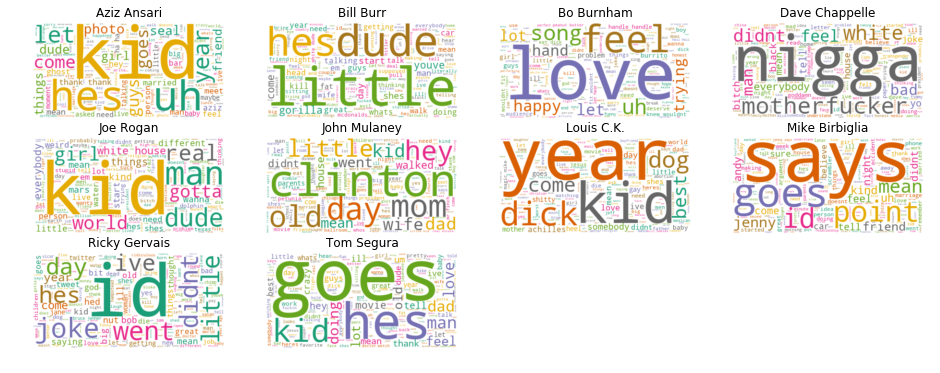

In [79]:
# Reset output dimensions
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16,6]

full_names = ['Aziz Ansari', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Joe Rogan',
              'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais', 'Tom Segura']

#Create subplots for each comedian
for index, comedian in enumerate(data_dtm.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis ("off")
    plt.title(full_names[index])

plt.show()

In [81]:
#Find the number of unique words that each comedian uses

#Identify the non-zero items in the DTM, meaning that the word occurs at least once
unique_list = []
for comedian in data_dtm.columns:
    uniques = data_dtm[comedian].nonzero()[0].size
    unique_list.append(uniques)

#Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns = ['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by = "unique_words")
data_unique_sort


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,comedian,unique_words
6,Louis C.K.,1093
2,Bo Burnham,1231
3,Dave Chappelle,1270
9,Tom Segura,1339
5,John Mulaney,1391
4,Joe Rogan,1435
7,Mike Birbiglia,1494
0,Aziz Ansari,1582
8,Ricky Gervais,1633
1,Bill Burr,1662


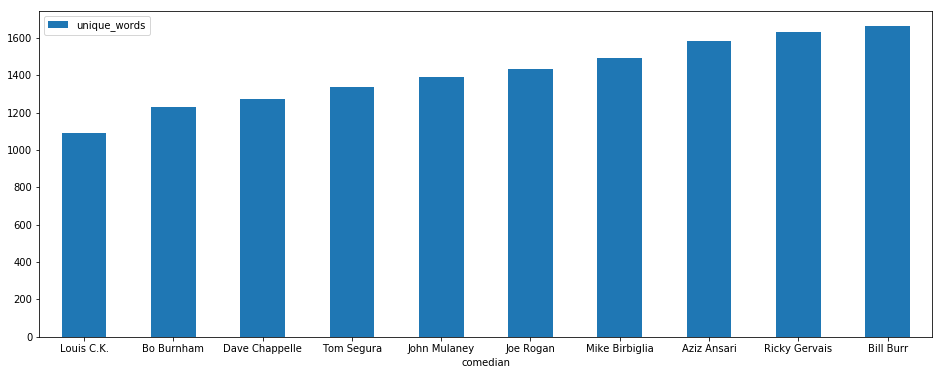

In [82]:
ax = data_unique_sort.plot.bar(x='comedian', y='unique_words', rot=0)

In [88]:
#Calculate the words per minute of each comedian

#Find total number of words that comedian uses
total_list = []
for comedian in data_dtm.columns:
    totals = sum(data_dtm[comedian])
    total_list.append(totals)

    
#Add full names of comedians to DF
full_names = ['Aziz Ansari', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Joe Rogan',
              'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais', 'Tom Segura']
    
    
#Comedy special run times from IMDB, minutes
run_times = [80,77, 60, 64, 63, 61, 74, 84, 79, 73]

#Add columns to dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
6,Louis C.K.,1093,3651,74,49.337838
2,Bo Burnham,1231,3175,60,52.916667
7,Mike Birbiglia,1494,4741,84,56.440476
3,Dave Chappelle,1270,3660,64,57.187500
9,Tom Segura,1339,4499,73,61.630137
8,Ricky Gervais,1633,4972,79,62.936709
5,John Mulaney,1391,4001,61,65.590164
0,Aziz Ansari,1582,5766,80,72.075000
4,Joe Rogan,1435,4579,63,72.682540
1,Bill Burr,1662,5845,77,75.909091


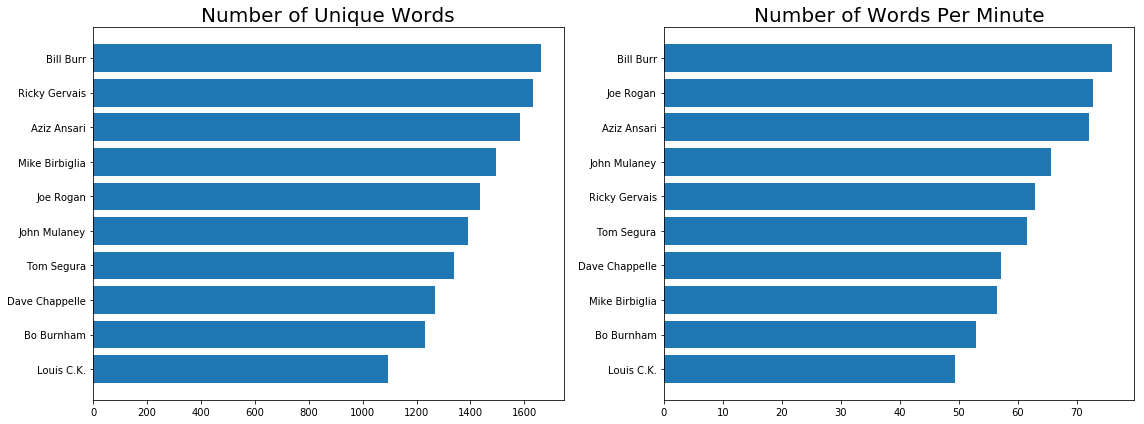

In [89]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()